In [15]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [16]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [17]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [18]:
INSTITUTION_ID = "ins_109508"

In [19]:
client = plaid.Client(client_id = PLAID_CLIENT_ID,secret = PLAID_SECRET, public_key = PLAID_PUBLIC_KEY, environment = PLAID_ENV  )

### 2. Generate a public token

In [20]:
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions', 'income', 'assets'])

### 3. Exchange the public token for an access token

In [21]:
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [22]:
client.Accounts.get(access_token)

{'accounts': [{'account_id': '8BkdQ7yZXVIEpaKpgopeUqWNvXBDNQswRRL5k',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'EM5p6Al3XEuvlpDlXQlnUxeQqjNdQ6uXMMkzW',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'W6579ZqkngT7g3ogPqgEUM5e1XZae6Il551xL',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [40]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transaction_response = client.Transactions.get(access_token,start_date,end_date)
pretty_print_response(transaction_response)

{
    "accounts": [
        {
            "account_id": "8BkdQ7yZXVIEpaKpgopeUqWNvXBDNQswRRL5k",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "EM5p6Al3XEuvlpDlXQlnUxeQqjNdQ6uXMMkzW",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

### 2. Print the categories for each transaction

In [24]:
transactions = transaction_response['transactions']
for transaction in transactions:
    print(transaction['category'][0])

Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [25]:
date = []
name = []
amount = []
category = []
for transaction in transactions:
    date.append(transaction['date'])
    name.append(transaction['name'])
    amount.append(transaction['amount'])
    category.append(transaction['category'][0])
transaction_dict = {'DATE':date, 'NAME':name,'AMOUNT':amount,'CATEGORY':category}
transaction_df = pd.DataFrame(transaction_dict)  
transaction_df = transaction_df.set_index('DATE')
transaction_df.head(100)

,NAME,AMOUNT,CATEGORY
DATE,,,
2019-08-19,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
2019-08-19,Uber 063015 SF**POOL**,5.40,Travel
2019-08-18,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
2019-08-18,CD DEPOSIT .INITIAL.,1000.00,Transfer
2019-08-17,Touchstone Climbing,78.50,Recreation
2019-08-17,United Airlines,-500.00,Travel
2019-08-16,McDonald's,12.00,Food and Drink
2019-08-16,Starbucks,4.33,Food and Drink
2019-08-15,SparkFun,89.40,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [26]:
transaction_df.index = pd.to_datetime(transaction_df.index)
transaction_df.index.dtype
transaction_df.dtypes

NAME         object
AMOUNT      float64
CATEGORY     object
dtype: object

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [27]:
income_response = client.Income.get(access_token)
previous_year_gross_income = income_response['income']['last_year_income_before_tax']
monthly_income = income_response['income']['income_streams'][0]['monthly_income']
projected_gross_income = income_response['income']['projected_yearly_income_before_tax']
print(f"Previous year gross income: ${previous_year_gross_income}")
print(f"Monthly income: ${monthly_income}")
print(f"Projected gross income: ${projected_gross_income}")


Previous year gross income: $7285
Monthly income: $500
Projected gross income: $7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [28]:
total_spending_per_category = transaction_df.groupby('CATEGORY')['AMOUNT'].sum()
print(f"Total spending per category: {total_spending_per_category}")

Total spending per category: CATEGORY
Food and Drink     3317.19
Payment            6310.50
Recreation          235.50
Shops              1500.00
Transfer          20537.34
Travel               35.19
Name: AMOUNT, dtype: float64


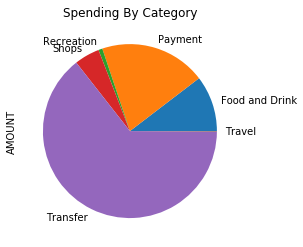

In [29]:
total_spending_per_category.plot(kind='pie', title = 'Spending By Category')

In [36]:
number_transactions_per_category = transaction_df.groupby('CATEGORY')['AMOUNT'].count().sort_values(ascending = False)
print(number_transactions_per_category)

CATEGORY
Food and Drink    15
Travel            12
Transfer           9
Payment            6
Shops              3
Recreation         3
Name: AMOUNT, dtype: int64


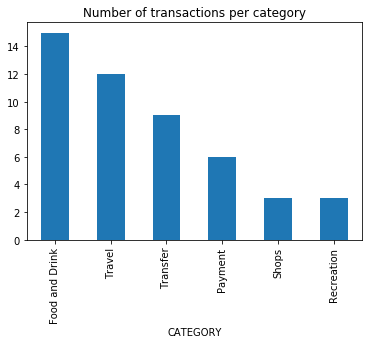

In [37]:
number_transactions_per_category.plot(kind = 'bar', title = 'Number of transactions per category')

### Calculate the expenses per month

In [38]:
expenses_by_month = transaction_df.groupby(transaction_df.index.month)['AMOUNT'].sum()
print(f"Expenses by month: {expenses_by_month}")

Expenses by month: DATE
5     3578.50
6    10645.24
7    10645.24
8     7066.74
Name: AMOUNT, dtype: float64


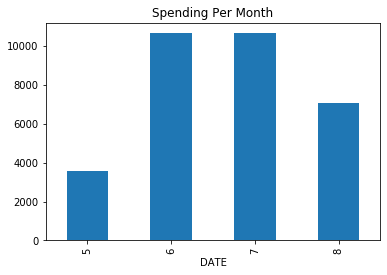

In [39]:
expenses_by_month.plot(kind='bar', title='Spending Per Month')